In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.modeling.train_sentiment import train_and_evaluate_sentiment

In [4]:
sns.set(style="whitegrid")

## Training & evaluation

In [5]:
# Step 1: Execute model training and evaluation
train_and_evaluate_sentiment()
print("Sentiment model pipeline executed.")

Epoch 1/20
418/418 - 87s - loss: 0.8740 - accuracy: 0.4798 - val_loss: 0.9004 - val_accuracy: 0.5684 - lr: 0.0010 - 87s/epoch - 209ms/step
Epoch 2/20
418/418 - 89s - loss: 0.6509 - accuracy: 0.6235 - val_loss: 0.7328 - val_accuracy: 0.6552 - lr: 0.0010 - 89s/epoch - 212ms/step
Epoch 3/20
418/418 - 89s - loss: 0.5952 - accuracy: 0.6626 - val_loss: 0.6840 - val_accuracy: 0.7066 - lr: 0.0010 - 89s/epoch - 214ms/step
Epoch 4/20
418/418 - 92s - loss: 0.4971 - accuracy: 0.7370 - val_loss: 0.5647 - val_accuracy: 0.7679 - lr: 0.0010 - 92s/epoch - 219ms/step
Epoch 5/20
418/418 - 92s - loss: 0.3792 - accuracy: 0.8070 - val_loss: 0.5326 - val_accuracy: 0.7784 - lr: 0.0010 - 92s/epoch - 221ms/step
Epoch 6/20
418/418 - 124s - loss: 0.4599 - accuracy: 0.7608 - val_loss: 0.5868 - val_accuracy: 0.7741 - lr: 0.0010 - 124s/epoch - 297ms/step
Epoch 7/20
418/418 - 96s - loss: 0.4039 - accuracy: 0.8016 - val_loss: 0.4947 - val_accuracy: 0.7976 - lr: 0.0010 - 96s/epoch - 230ms/step
Epoch 8/20
418/418 - 101s

In [7]:
# Load metrics report
import json
with open("../outputs/sentiment_accuracy.txt", "r") as f:
    report = json.load(f)

In [8]:
# Convert classification report to DataFrame
report_df = pd.DataFrame(report).T
report_df = report_df.round(3)
display(report_df)

,precision,recall,f1-score,support
negative,0.706,0.844,0.769,2001.00
neutral,0.903,0.850,0.876,8805.00
positive,0.765,0.802,0.783,2556.00
accuracy,0.840,0.840,0.840,0.84
macro avg,0.791,0.832,0.809,13362.00
weighted avg,0.847,0.840,0.842,13362.00


<Figure size 1000x400 with 0 Axes>

/Users/deeasonsitaula/.pyenv/versions/3.8.10/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


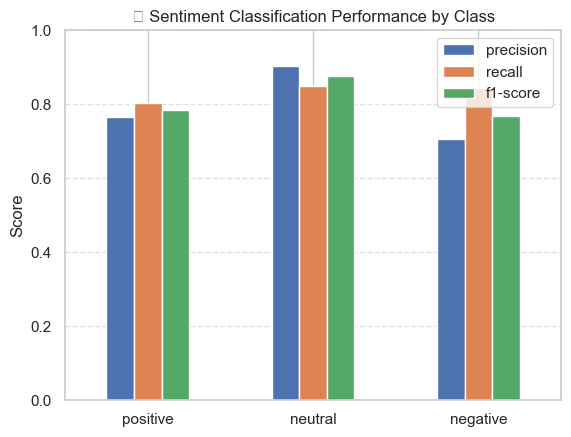

In [10]:
#  Visualize key performance metrics
plt.figure(figsize=(10, 4))
report_df.loc[["positive", "neutral", "negative"], ["precision", "recall", "f1-score"]].plot(kind="bar")
plt.title("📊 Sentiment Classification Performance by Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [13]:
#  Sample predictions
pred_df = pd.read_csv("../outputs/predictions_sentiment.csv")
display(pred_df.sample(20))

,true_sentiment,predicted_sentiment
4368,neutral,neutral
7967,positive,neutral
477,neutral,neutral
8574,negative,negative
1250,neutral,neutral
10946,neutral,neutral
9315,neutral,neutral
972,neutral,neutral
2775,positive,neutral
5594,neutral,positive
